In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


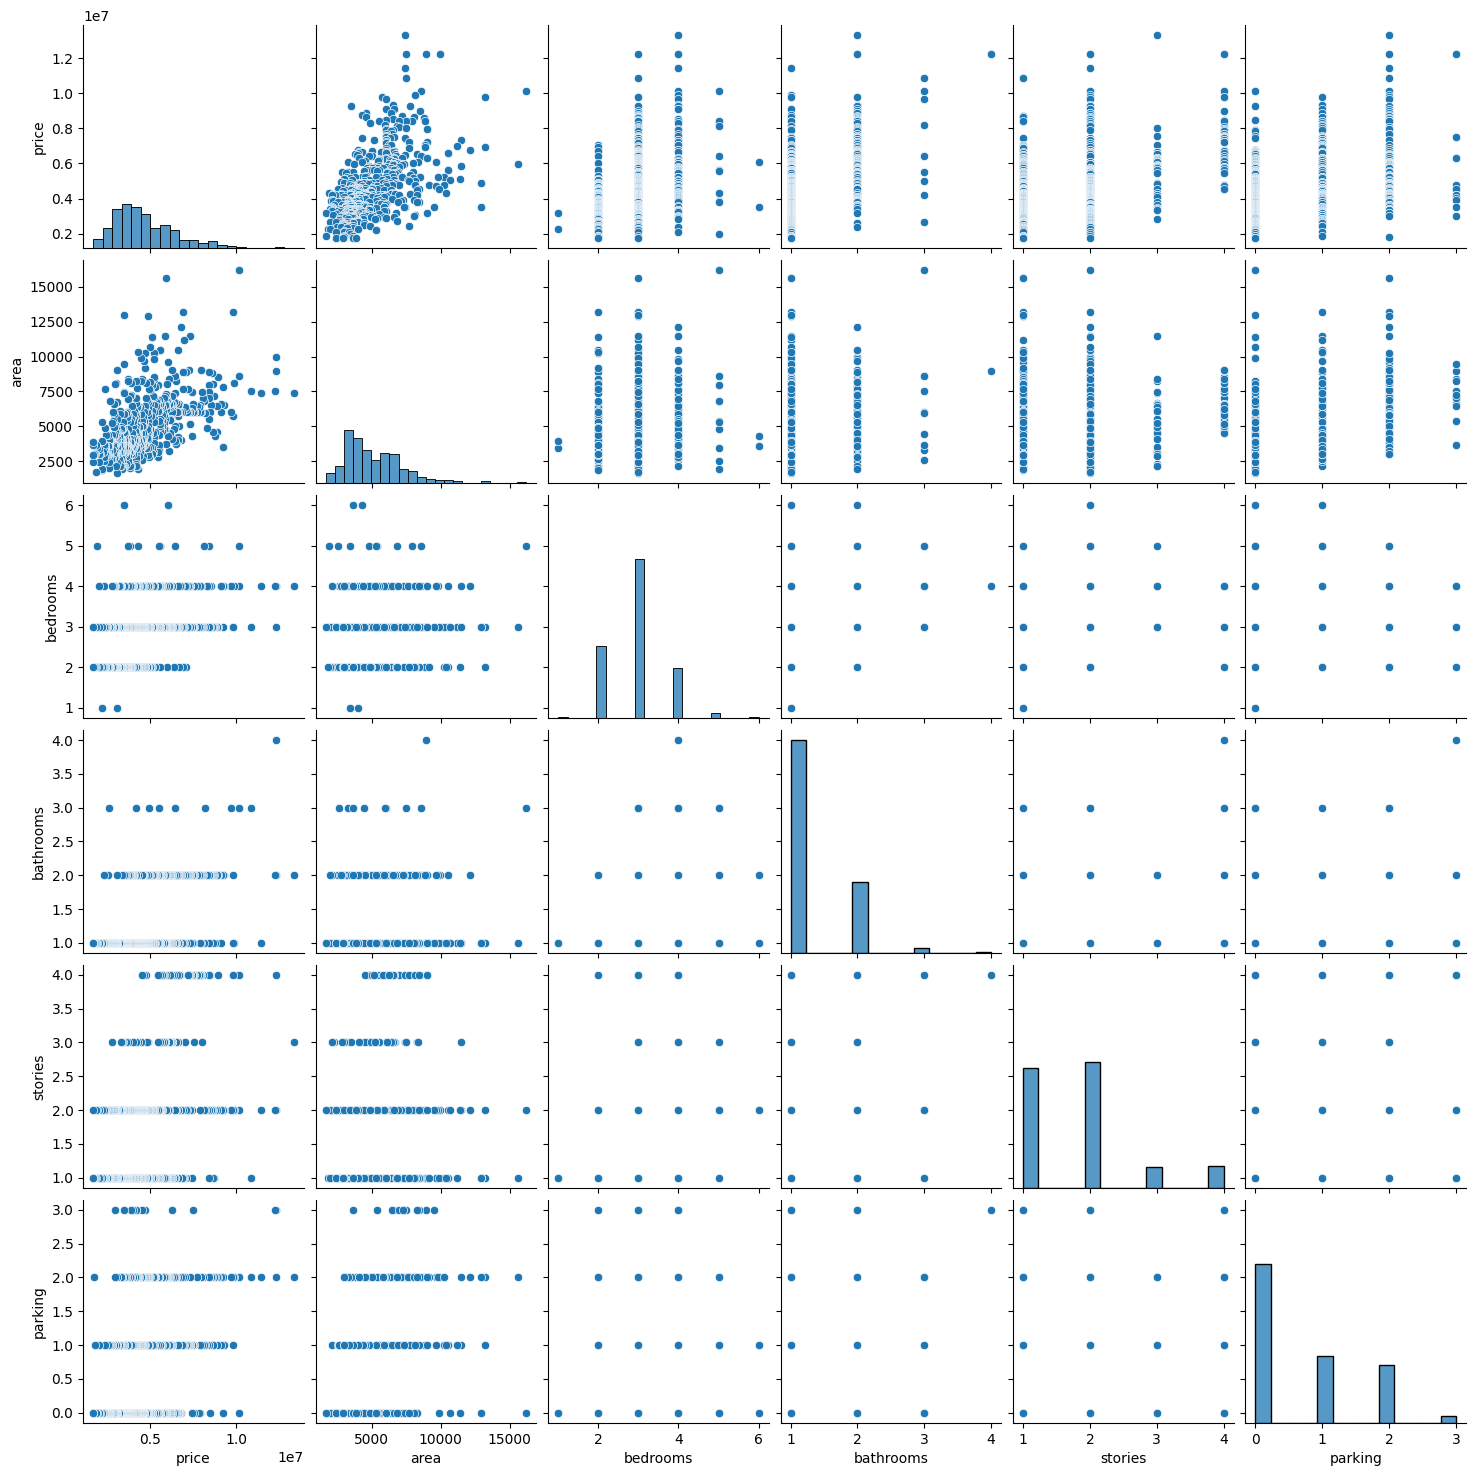

In [ ]:
sns.pairplot(df)
plt.show()

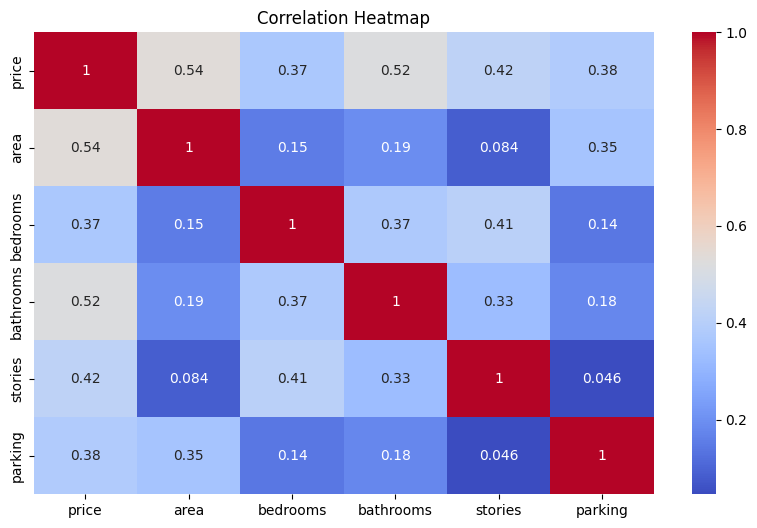

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') # Calculate correlation for numerical columns only
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Preprocessing
# Assuming no missing values or categorical variables in this case
# Scaling the features (optional, but can be useful for some models)
scaler = StandardScaler()

# Select features and target variable
# Check for typos, case sensitivity, and extra spaces in column names

#X = df[['bedrooms', 'bathrooms']]  # Features
#y = df['area']  # Target variable

X = df[['area','bedrooms', 'bathrooms']]  # Features
y = df['price']  # Target variable
# Scaling the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#accuracy = r2 * 100
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
#print(f"Model Accuracy: {accuracy}%")

Mean Squared Error: 2750040479309.0522
R-squared: 0.4559299118872445


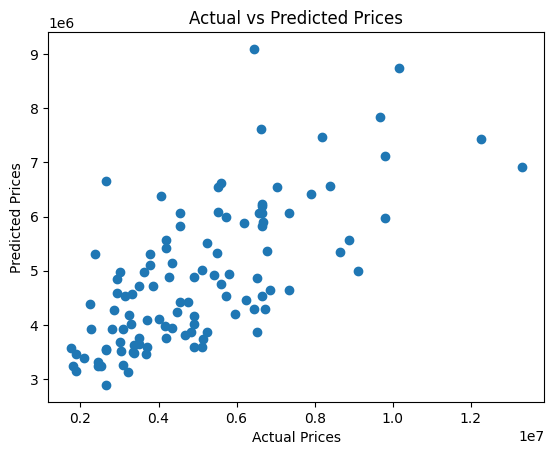

Model Coefficients: [749023.05142651 265604.85843734 714016.44847748]
Model Intercept: 4736303.161529644


In [ ]:
# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Display the coefficients of the model
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

In [ ]:
#Additional Metrics Explanation:
#Mean Absolute Error (MAE):
#Measures the average magnitude of errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation.
#Mean Squared Error (MSE):
#The average of squared differences between prediction and actual observation; a higher MSE indicates a higher magnitude of error.
#Root Mean Squared Error (RMSE):
#The square root of the average of squared differences between prediction and actual observation. It gives a relatively high weight to large errors, making it useful for identifying significant prediction errors.
#Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. R² of 1 indicates that the model explains all the variance of the target variable.

**Cross-Validation:**

Implement cross-validation to assess the model's performance more robustly by averaging the results across multiple training and test splits.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² from Cross-Validation: {np.mean(cv_scores)}")

Cross-Validation R² Scores: [ -3.23415827  -7.66529992 -16.80680846 -27.88609775 -14.3534265 ]
Mean R² from Cross-Validation: -13.98915818011171


**Residual Analysis:**

Analyze the residuals (the difference between actual and predicted values) to check for any patterns that might suggest the model is not capturing certain aspects of the data.

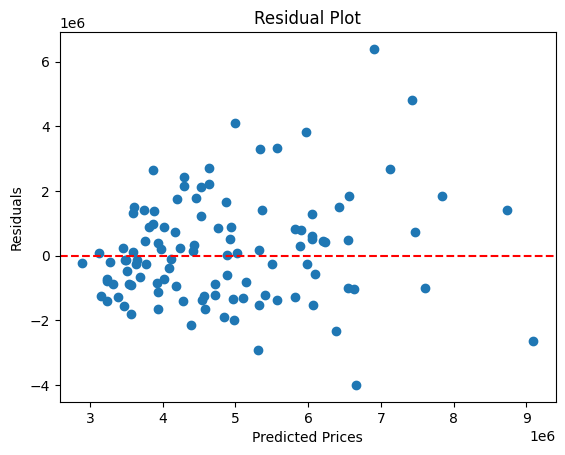

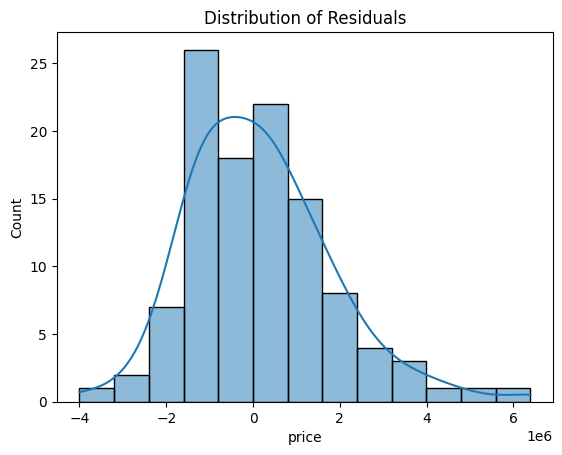

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Check for normality of residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

**Polynomial Features**

Introduce polynomial features to the model to capture non-linear relationships between the predictors and the target variable.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Split data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial MSE: {mse_poly}")
print(f"Polynomial R²: {r2_poly}")

Polynomial MSE: 2577444243113.7705
Polynomial R²: 0.49007648178002305


**Learning Curve**

Plot a learning curve to visualize how the model's performance changes with varying amounts of training data, helping to detect overfitting or underfitting.

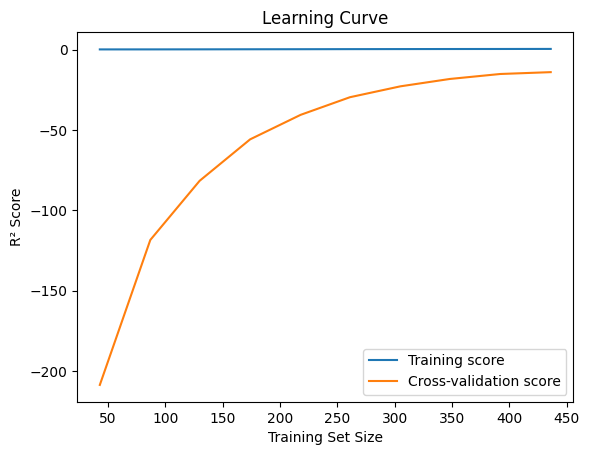

In [ ]:
from sklearn.model_selection import learning_curve

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, scoring='r2',
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

**Feature Importance/Selection**

In [ ]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=LinearRegression(), n_features_to_select=2)
rfe.fit(X_scaled, y)

# Check selected features
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

Selected Features: [ True False  True]
Feature Ranking: [1 2 1]


**Handling Multicollinearity**

Check for multicollinearity among features using the Variance Inflation Factor (VIF) and take steps to address it.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)


     Feature       VIF
0       area  1.047002
1   bedrooms  1.171470
2  bathrooms  1.189125


**Outlier Detection and Treatment**

In [ ]:
from scipy import stats

# Detect outliers using Z-score
z_scores = np.abs(stats.zscore(X))
outliers = (z_scores > 3).any(axis=1)

# Filter out outliers
X_no_outliers = X[~outliers]
y_no_outliers = y[~outliers]


**Advanced Visualisation**

Create more advanced visualizations such as partial dependence plots, or interactive plots using libraries like Plotly.

In [ ]:
import plotly.express as px

# Verify the correct column name and that 'df' is loaded
print(df.columns)  # Check available columns in 'df'

# 3D scatter plot of the features and target (adjust column name if needed)
fig = px.scatter_3d(df, x='area', y='bedrooms', z='bathrooms', color='price')  # Replace 'area' with the actual column name if different
fig.show()

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
